# Objetivo

Neste notebook será feito um procedimento de machine learning um pouco mais avançado. Um dos maiores problemas em ML é o fato de que o dataset que é recebido nem sempre tem uma qualidade desejável. Isso significa que **os próprios dados que lhe foram entregues têm falhas**.

Com isso, lhe foi dado um dataset que servirá para fazer um classificador entre gatos e não-gatos. Sua tarefa será:

- Ler e fazer análise de dados do dataset. Isso pode ser feito utilizando diversas técnicas de ciência de dados. Obrigatoriamente, a leitura deve ser feita utilizando **PANDAS**. 

- Considerando que o dataset de gatos possui falhas, você terá que inspecionar os dados e fazer uma limpeza. Para isso, você pode utilizar, por exemplo, as técnicas de detecção de outliers ensinadas nas aulas, ou outras técnicas que achar mais apropriado. Note que *não é um problema* um detector de outliers pegar muitas fotos de gatos, desde que possa também capturar os outliers para remoção manual (ou simplesmente fazer uma filtragem simples para o classificador).

- Após fazer a limpeza dos dados, você deve fazer um classificador entre gatos e não-gatos. Para isso, pode-se utilizar ferramentas de Machine Learning e Data Science, utilizando, de preferência, sklearn, **não sendo permitido** o uso de Keras, Tensorflow, PyTorch e ferramentas similares de deep learning.

O Dataset disponibilizado é o dataset_catvnoncat1.csv e o dataset_catvnoncat2.csv

Você recebeu de duas fontes diferentes os dois datasets e deverá limpar eles e os deixar preparados para a classificaçãão gato vs todos usando algum modelo de Machine Learning de sua escolha.

Será necessário abrir no minimo uma imagem do dataset utilizando plt.imshow() e procurar dados repetidos ou outliers gerais. **Sempre justificando em texto as analises.**

Boa sorte!!!



---


> Você terá 1 semana para entregar o notebook a partir de hoje. Logo, a data final de envio será dia 26/02 às 23:59; **Lembre-se também de me enviar junto a esse notebook o notebook que foi passado em aula, com as analises extras e plots a mais**
>
>
> A principio enviar um .zip ou .7z com os arquivos referentes a entrega para o email: lucas.moura_catron@outlook.com com cópia para o email ygabreu@latam.stefanini.com

## Sobre como será dada a nota:

Dessa vez faremos uma abordagem diferente. A pontuação será dada pelo domínio e uso correto das bibliotecas usadas. Não será cobrada a avaliação baseada em acurácia. Portanto, foquem apenas em fazer o código rodar ;)

# Bibliotecas a serem utilizadas

In [0]:
import cv2

import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Carregamento e limpeza dos dados

 - Juntar os dois CSV em um único dataframe
 - Tratar dados nulos (alguns elementos do dataset são NaN (pesquisar por isso))
 - Procurar por outliers (pode haver elementos classificados incorretamente no próprio dataset)
 - Utilizar as técnicas que bem entender (inclusive técnicas de aprendizagem não supervisionada ou até mesmo supervisionado), desde que justificados.


In [0]:
import zipfile

link = 'https://drive.google.com/open?id=1-MVBT1XNahH5963WrW89Rni8iVa0pojZ'

fluff, file_id = link.split('=')
downloaded = drive.CreateFile({'id':file_id})
downloaded.GetContentFile('dataset.zip')

archives = zipfile.ZipFile('dataset.zip')

archives.extractall('dataset')

In [0]:
import pickle

catvnoncat1 = pd.read_pickle('dataset/dataset_catvnoncat1.pck')
catvnoncat2 = pd.read_pickle('dataset/dataset_catvnoncat2.pck')
print(catvnoncat1.info())
print(catvnoncat2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 2 columns):
image    121 non-null object
label    125 non-null object
dtypes: object(2)
memory usage: 2.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 2 columns):
image    151 non-null object
label    160 non-null object
dtypes: object(2)
memory usage: 2.7+ KB
None


In [0]:
print('catvnoncat1:')
(unique, counts) = np.unique(catvnoncat1.label, return_counts=True)
for i in range(len(unique)):
    print('Class: {} >>>> qt: {}'.format(unique[i], counts[i]))

print('\n\ncatvnoncat2:')
(unique, counts) = np.unique(catvnoncat2.label, return_counts=True)
for i in range(len(unique)):
    print('Class: {} >>>> qt: {}'.format(unique[i], counts[i]))

catvnoncat1:
Class: 0 >>>> qt: 43
Class: nan >>>> qt: 1
Class: 0 >>>> qt: 28
Class: 1 >>>> qt: 40
Class: nan >>>> qt: 1
Class: 1 >>>> qt: 14


catvnoncat2:
Class: 0.0 >>>> qt: 34
Class: nan >>>> qt: 1
Class: 0 >>>> qt: 9
Class: nan >>>> qt: 1
Class: 0 >>>> qt: 16
Class: nan >>>> qt: 1
Class: 0 >>>> qt: 1
Class: nan >>>> qt: 1
Class: 0 >>>> qt: 35
Class: 1 >>>> qt: 37
Class: nan >>>> qt: 1
Class: 1 >>>> qt: 28


Com o output acima, verificamos que não existe um padrão para o tipo do valor adotado na coluna de label para ambos os datasets. Deve-se tratar os dados faltantes e padronizar o tipo.


In [0]:
catvnoncat2.image[1].shape

(64, 64, 3)

In [0]:
catvnoncat1.image[1].shape

(64, 64, 3)

In [0]:
df = pd.concat([catvnoncat1, catvnoncat2], ignore_index=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 2 columns):
image    272 non-null object
label    285 non-null object
dtypes: object(2)
memory usage: 4.7+ KB


A partir dessas informações, verifica-se que existem campos faltantes, tanto em *labels* quanto em imagens. Não se pode fazer nada com as imagens faltantes, portanto devemos excluir as entradas que possuem tais campos nulos.

In [0]:
clean_df = df.dropna(subset=['image']).copy()

clean_df.reset_index(inplace=True, drop=True)
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 0 to 271
Data columns (total 2 columns):
image    272 non-null object
label    267 non-null object
dtypes: object(2)
memory usage: 4.4+ KB


Agora observa-se a quantidade de entradas com *label* faltantes. Como são apenas 5, é possível visualizar esses dados e adicionar o label correto. A seguir, visualizamos 9 fotos aleatórias com seus títulos referenciando a classe que ela pertence. A partir dela, verifica-se que a Classe 1 representa fotos de gatos.

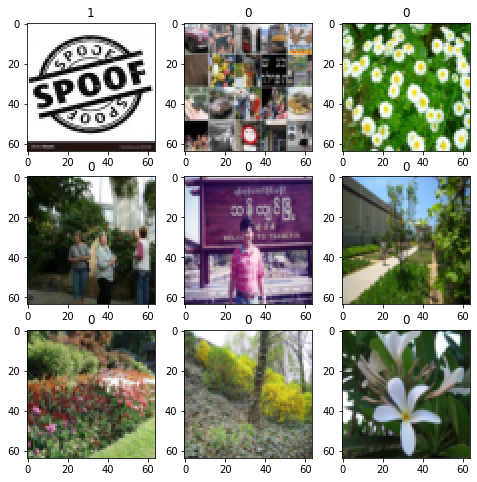

In [0]:
random = clean_df.sample(9).reset_index(drop=True)

fig=plt.figure(figsize=(8, 8))
for index, row in random.iterrows():
    fig.add_subplot(3, 3, index + 1)
    plt.title(row.label)
    plt.imshow(row.image)


Com isso, pegamos todas as linhas em que a label é nula e plotamos suas imagens

In [0]:
indexes = clean_df[clean_df.isnull().any(axis=1)].index

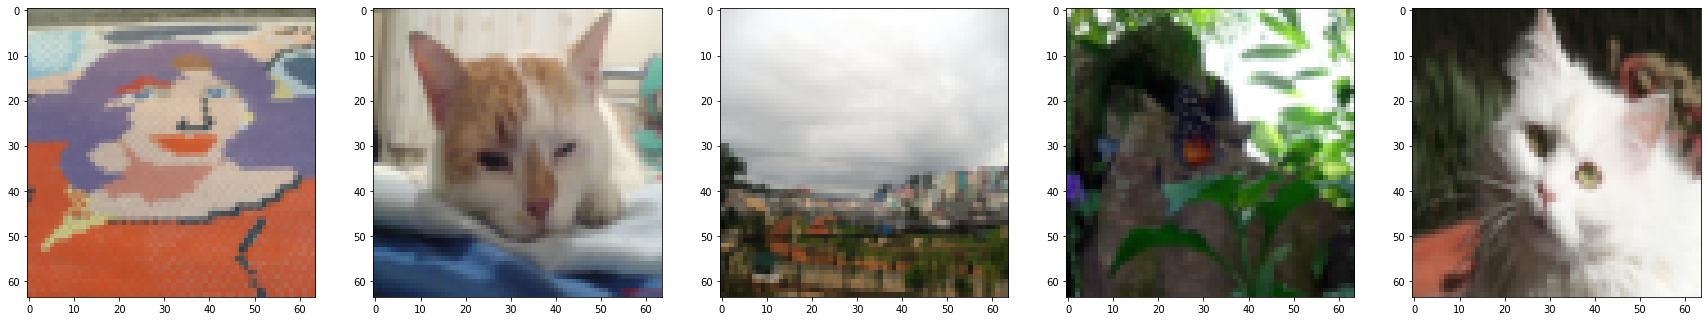

In [0]:
fig=plt.figure(figsize=(30, 30))
for index in range(1, len(indexes) + 1):
    fig.add_subplot(1, len(indexes), index)
    plt.imshow(clean_df.iloc[indexes[index-1]].image)


A partir disso, é possível atribuir manualmente as classes para cada linha identificada. Isso é feito no bloco a seguir.

In [0]:
clean_df.iloc[indexes[0]].label = 0
clean_df.iloc[indexes[1]].label = 1
clean_df.iloc[indexes[2]].label = 0
clean_df.iloc[indexes[3]].label = 0
clean_df.iloc[indexes[4]].label = 1

Agora também podemos indicar um tipo padrão para toda a coluna de label.

In [0]:
clean_df.label = clean_df.label.astype(int)

In [0]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 0 to 271
Data columns (total 2 columns):
image    272 non-null object
label    272 non-null int64
dtypes: int64(1), object(1)
memory usage: 4.4+ KB


Agora, o dataframe não possui mais nenhum campo nulo. 

In [0]:
(unique, counts) = np.unique(clean_df.label, return_counts=True)
for i in range(2):
    print('Class: {} >>>> qt: {}'.format(unique[i], counts[i]))

Class: 0 >>>> qt: 158
Class: 1 >>>> qt: 114


In [0]:
from skimage.color import rgb2grey
import cv2


def grey_flatten(img):
    return rgb2grey(img).flatten()

def fd_hu_moments(img):
    image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    feature = cv2.HuMoments(cv2.moments(image)).flatten()
    return feature

def center_mass_cx(img):
    import scipy.ndimage as ndi            # to determine shape centrality
    cy, cx = ndi.center_of_mass(rgb2grey(img))
    return cx, cy

full_df = pd.DataFrame()
full_df['mass'] = clean_df.image.apply(center_mass_cx)
full_df['hu'] = clean_df.image.apply(fd_hu_moments)
full_df['image'] = clean_df.image.apply(grey_flatten)
full_df['label'] = clean_df.label

In [0]:
# images = np.array(full_df['image'])

In [0]:
hus = np.array(full_df['hu'])

In [0]:
mass = np.array(full_df['mass'])

In [0]:
X = np.concatenate((np.vstack(mass), np.vstack(hus)), axis=1)

In [0]:
X.shape

(272, 9)

In [0]:
Y = full_df.label

In [0]:
new_df = pd.DataFrame(X)

In [0]:
new_df['label'] = full_df.label.copy()

In [0]:
new_df.sample(2)

,0,1,2,3,4,5,6,7,8,label
155,31.994760,27.991037,0.001973,2.394070e-08,3.675017e-10,2.385108e-10,5.976223e-20,-1.281966e-14,-3.761427e-20,0
120,31.192818,30.754308,0.001188,3.289540e-09,7.022657e-13,5.671583e-13,-3.561125e-25,-3.170587e-17,-3.609903e-26,0


A seguir, verifica-se os outliers existentes no dataset inteiro utilizando tanto o momento quanto o centro de massa. Isso é feito pela verificação do z-score é maior que 5. Quando isso ocorre, a imagem encontrada é excluída do dataframe

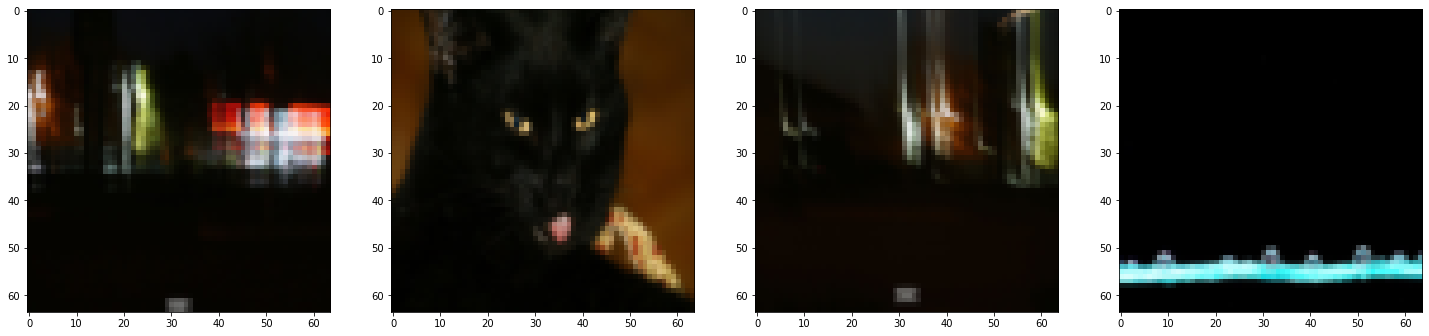

In [0]:
from scipy import stats

outliers_indexes = new_df[np.abs(stats.zscore(new_df.drop(['label'], axis=1)) > 5)].index.unique()

fig=plt.figure(figsize=(25, 25))
for index in range(1, len(outliers_indexes) + 1):
    fig.add_subplot(1, len(outliers_indexes), index)
    plt.imshow(clean_df.iloc[outliers_indexes[index-1]].image)
    new_df.drop(outliers_indexes[index-1], inplace=True)

Dentre as imagens retiradas, verificamos que existiam fotos que não seguem um padrão do dataframe, portanto suas exclusões podem melhorar o desempenho de modelos de ML. Uma delas, entretanto, possui apenas a foto de um gato preto, mas ainda assim foi identificado como um outlier, não invalidando a sua exclusão.

A seguir, verificou-se outliers novamente, entretanto agora apenas nos campos em que a Classe é igual a 1 (Gato). Utilizou-se novamente o z-score mas o diminuiu para o valor de 1.5. 

In [0]:
cats = new_df.label == 1

cats_df = new_df[cats]

24


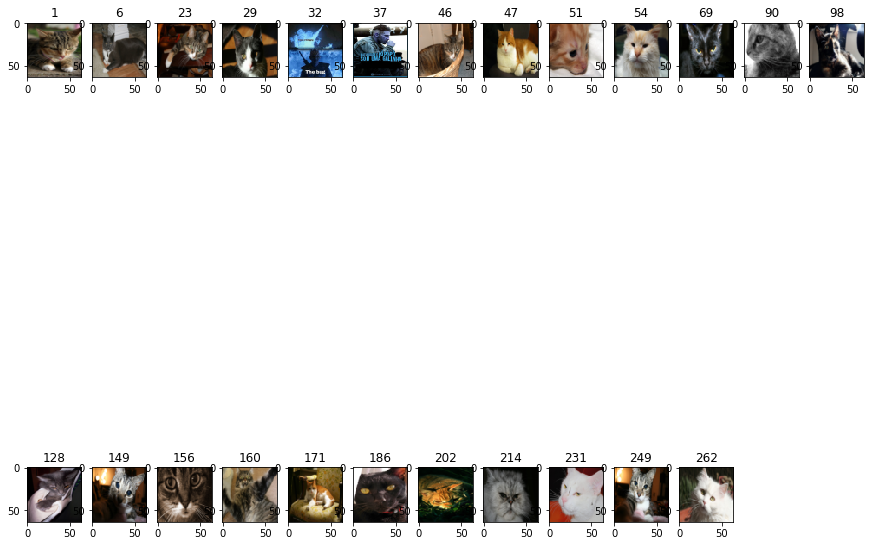

In [0]:
outliers_indexes = cats_df[np.abs(stats.zscore(cats_df.drop(['label'], axis=1)) > 1.5)].index.unique()
print(len(outliers_indexes))

fig=plt.figure(figsize=(15, 15))
for index in range(1, len(outliers_indexes) + 1):
    fig.add_subplot(2, len(outliers_indexes)/2 + 1, index)
    plt.imshow(clean_df.iloc[outliers_indexes[index-1]].image)
    plt.title(outliers_indexes[index-1])

Dentre as imagens obtidas, verifica-se que 2 imagens estão com label errada - a 32 e a 37. Portanto, devemos consertar esse erro, o que é feito no bloco de código a seguir.

In [0]:
new_df.iloc[32].label = 0
new_df.iloc[37].label = 0

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5208: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [0]:
new_df.head()

,0,1,2,3,4,5,6,7,8,label
0,31.380722,33.593113,0.001387,5.902360e-09,9.185551e-12,1.232328e-11,1.118284e-22,8.344775e-16,6.844506e-23,0
1,36.178214,31.828980,0.002137,9.377330e-08,2.571396e-11,2.031557e-10,-8.190065e-21,-6.154729e-14,-1.218714e-20,1
2,31.906498,30.178011,0.001744,3.813829e-08,7.303489e-12,1.435466e-11,-1.148148e-22,2.521229e-15,-9.176233e-23,1
3,31.202940,31.101205,0.001451,3.633452e-10,9.003801e-13,1.403393e-12,-1.485025e-24,1.031458e-18,5.323049e-25,0
4,29.961788,33.821773,0.000886,6.588414e-09,3.915782e-11,1.833770e-13,2.635959e-25,1.472395e-17,-4.147067e-25,1


# Construção do classificador utilizando SKLEARN

Construa aqui um classificador um contra todos. Você pode utilizar um classificador de uma classe, como por exemplo OneClassSVM ou o IsolationForest, ou pode utilizar um classificador binário, como um SVM convencional com o outro dataset. Ao final, justifique o motivo da sua escolha.

In [0]:
from sklearn.model_selection import train_test_split

X_train, x_test, Y_train, y_test = train_test_split(new_df.drop(['label'], axis=1), new_df['label'].astype(int), test_size=0.3, random_state=42)

In [0]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)

model.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

Foi escolhido o RandomForestClassifier pois seu modelo tende a aumentar a acurácia mesmo em bancos de dados com itens classificados erroneamente, além de ser muito adaptável a diversos tipos de problemas de classificação.

# Métricas de avaliação do modelo

Faça a avaliação do próprio modelo (acurácia, matriz de confusão, curva ROC e AUC), e no final comente o que achou: se o modelo que escolheu satisfaz suas expectativas, a acurácia, e onde você acha que seu modelo falha.

In [0]:
pred = model.predict(x_test)

In [0]:
pred

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0])

In [0]:
y_test.values

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1])

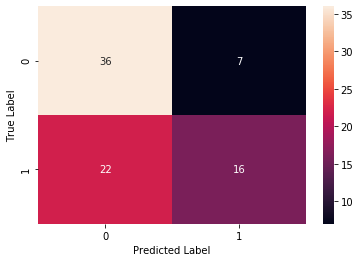

In [0]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_test, pred)

fig, ax = plt.subplots()

sns.heatmap(matrix, annot=True, fmt='d')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
fig.show()

In [0]:
from sklearn.metrics import accuracy_score

# Verificação da acurácia a partir da predição com valores de teste
print('Model Accuracy:\t\t', accuracy_score(y_test, pred))

Model Accuracy:		 0.6419753086419753


Os resultados obtidos não parecem muito favoráveis, visto que apenas atingiu-se 64%. Entretanto, o fato do dataset utilizado possuir poucas fotos e ainda com dimensões abaixo de 100x100 limita o uso de métricas superficiais sobre elas. Alem disso, ainda existem campos em que o dataset está com a label errada e que não foi possível identificar com análise de outliers, o que também limita os resultados possíveis com o modelo criado.